**WINE QUALITY PREDICTION**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#loading the dataset
wine_dataset=pd.read_csv("winequality-red.csv")
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_dataset.shape

(1599, 12)

In [4]:
# Checking for missing values
wine_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**DATA ANALYSIS AND VISULIZATION**

In [5]:
# Statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


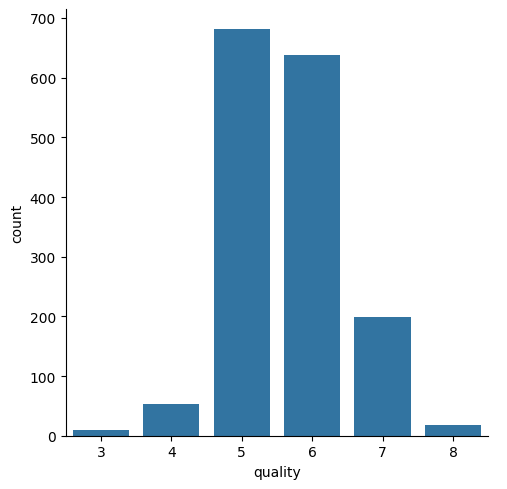

In [6]:
# Visualizing the distribution of wine quality scores
# This shows how many samples belong to each quality category
# Most wines have quality ratings of 5 and 6 (class imbalance present)

sns.catplot(x='quality',data=wine_dataset,kind='count')

/tmp/ipython-input-2041989099.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='quality', y=col, data=wine_dataset,ci=None)
/tmp/ipython-input-2041989099.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='quality', y=col, data=wine_dataset,ci=None)
/tmp/ipython-input-2041989099.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='quality', y=col, data=wine_dataset,ci=None)
/tmp/ipython-input-2041989099.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='quality', y=col, data=wine_dataset,ci=None)
/tmp/ipython-input-2041989099.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='quality', y=col, data=wine_dataset,ci=None)
/tmp/ipython-input-2041989099.py:6: FutureWarning:

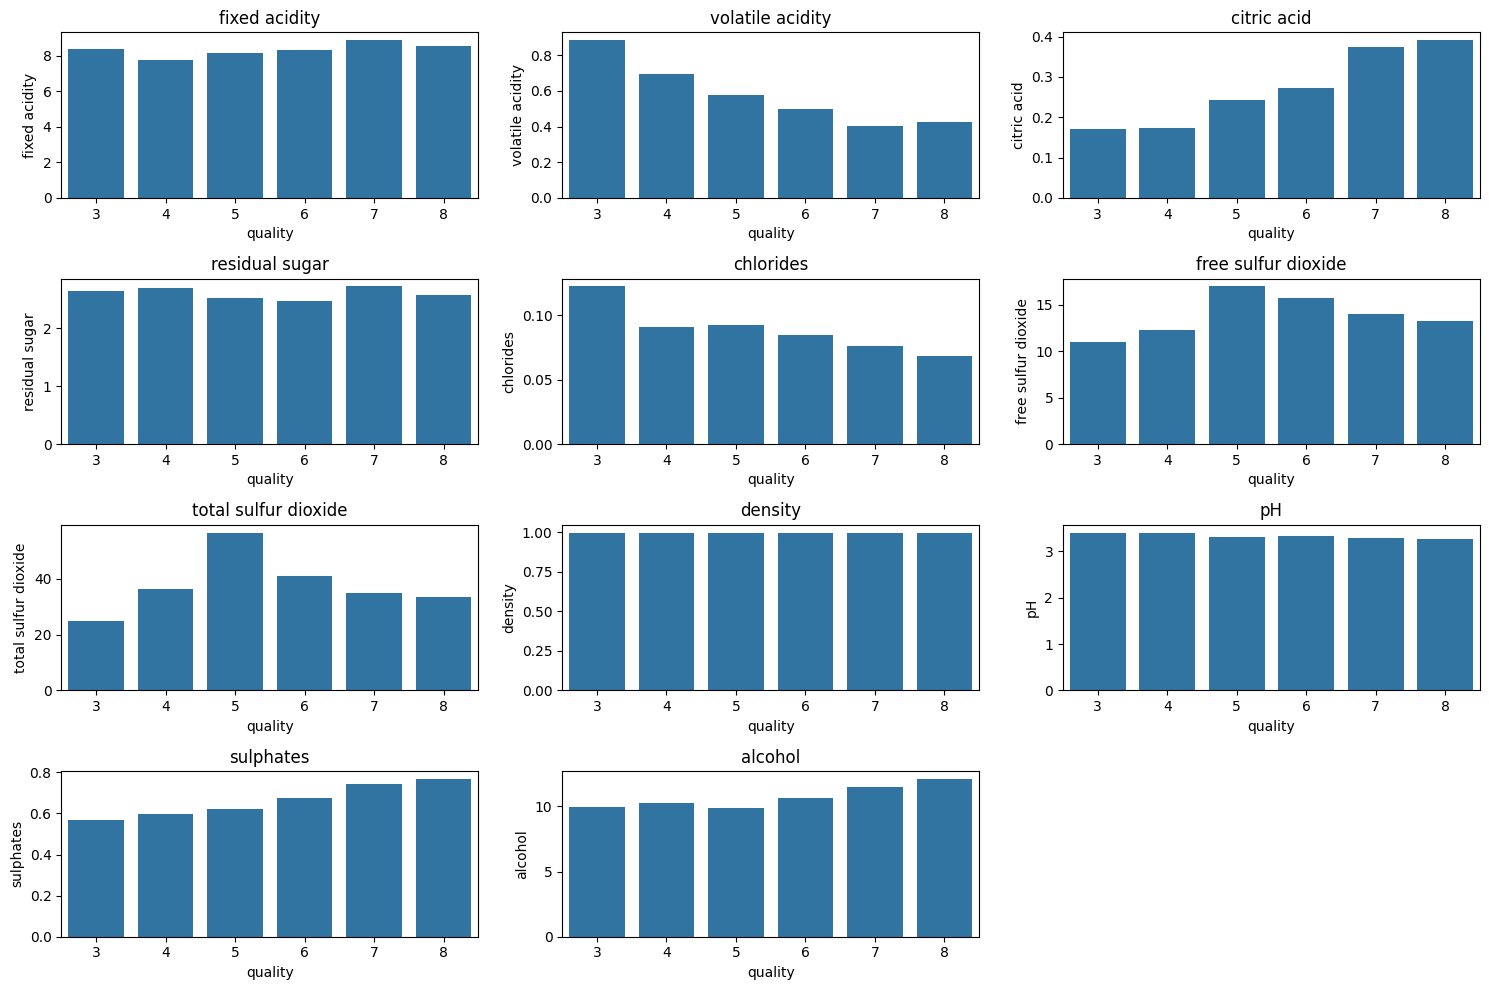

In [7]:
# Creating bar-graph ro compare every column to Quality
features = wine_dataset.columns.drop('quality')
plt.figure(figsize=(15,10))
for i, col in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.barplot(x='quality', y=col, data=wine_dataset,ci=None)
    plt.title(col)
plt.tight_layout()
plt.show()

**CORRELATION**

In [8]:
correlation=wine_dataset.corr()

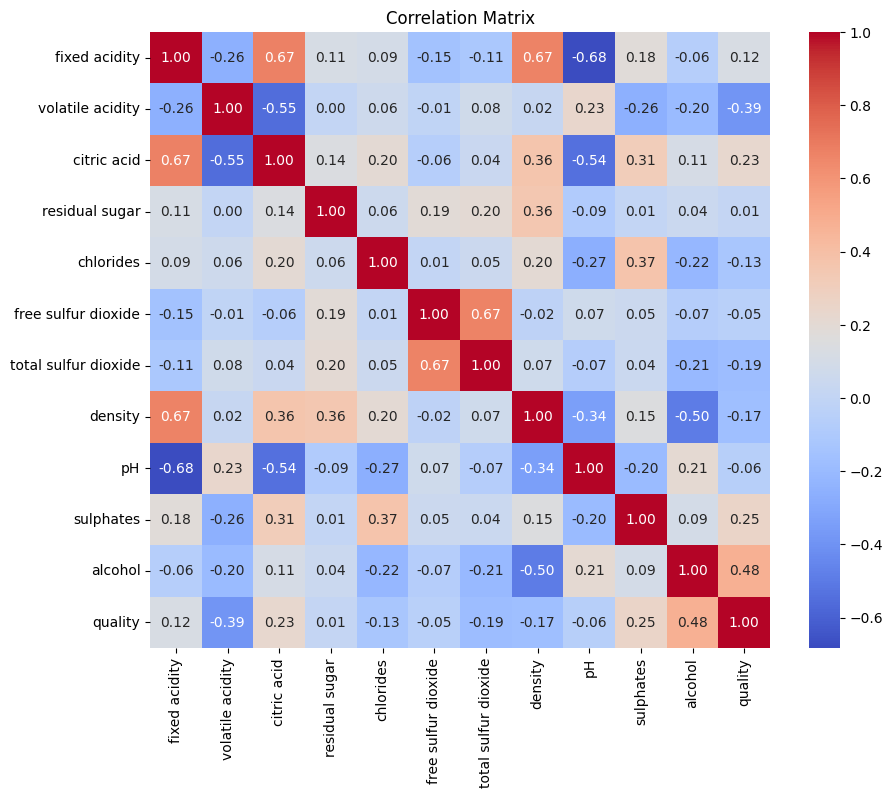

In [9]:
#Creating a heatmap to Compare every column with each other to visualise positive correlation and negative correlation
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**DATA PREPROCESSING**

In [12]:
# Separating the data and label
X=wine_dataset.drop('quality',axis=1)

In [13]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


**LABEL BINARIZATION**

We will create 2 Labels-> Good and Bad

In [15]:
y=wine_dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
y

,quality
0,0
1,0
2,0
3,0
4,0
...,...
1594,0
1595,0
1596,0
1597,0


**SPLITTING THE DATA INTO TRAINING AND TEST DATA**

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=67)

In [17]:
print(y.shape,y_train.shape,y_test.shape)

(1599,) (1279,) (320,)


**MODEL TRAINING**

Random Forest Classifier

In [18]:
model=RandomForestClassifier()

In [19]:
model.fit(X_train,y_train)

RandomForestClassifier()

**MODEL EVALUATION**

Accuracy Score

In [22]:
# Accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,y_test)
print("Accuracy: ",test_data_accuracy)

Accuracy:  0.9375


**BUILDING A PREDICTIVE SYSTEM**

In [26]:
input_data=(15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000)
input_df = pd.DataFrame([input_data], columns=X.columns)
prediction = model.predict(input_df)
print(prediction)
if prediction==1:
  print("Good quality wine")
else:
  print("Bad quality wine")

[1]
Good quality wine
